In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sns.set_theme(palette='viridis',style='darkgrid')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 250

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df = df[["Price","Age_08_04","KM","HP","cc","Gears","Quarterly_Tax","Weight"]]

In [5]:
df.rename({'Age_08_04':'Age'},axis = 1, inplace=True)

In [6]:
df.head(2)

,Price,Age,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165


In [7]:
df.shape

(1436, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [9]:
df.describe()

,Price,Age,KM,HP,cc,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,6.000000,283.000000,1615.00000


In [10]:
df.isna().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

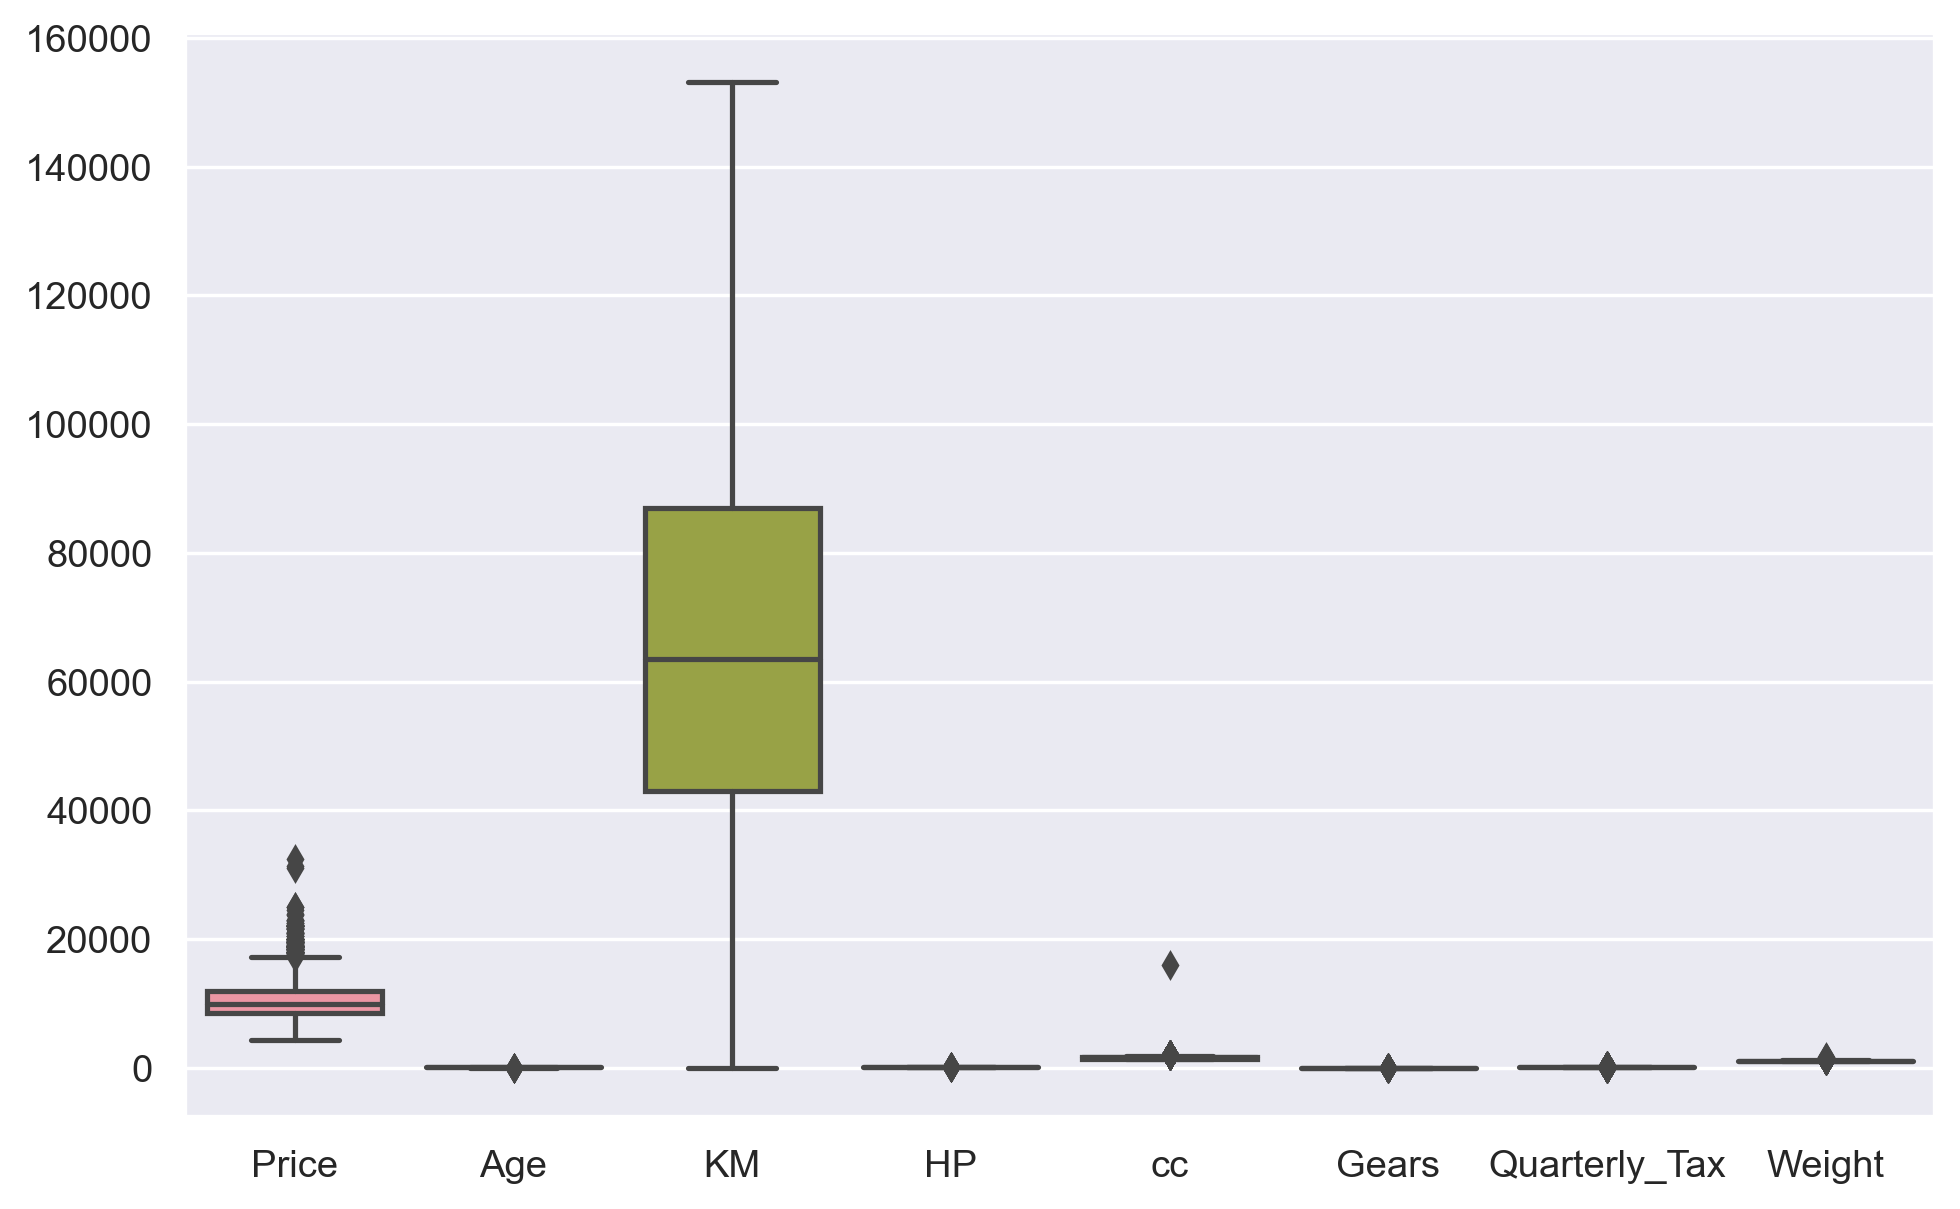

In [18]:
sns.boxplot(df)
plt.tight_layout()

In [12]:
df.duplicated().sum()

1

In [13]:
df[df.duplicated()]

,Price,Age,KM,HP,cc,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,234,1320


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
def outlier_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    df.loc[df[col]>upper, col] = upper
    df.loc[df[col]<lower, col] = lower

In [20]:
outlier_remove(df, 'KM')
outlier_remove(df, 'Age')
outlier_remove(df, 'HP')
outlier_remove(df, 'cc')
outlier_remove(df, 'Weight')
outlier_remove(df, 'Gears')
outlier_remove(df, 'Quarterly_Tax')

<Axes: >

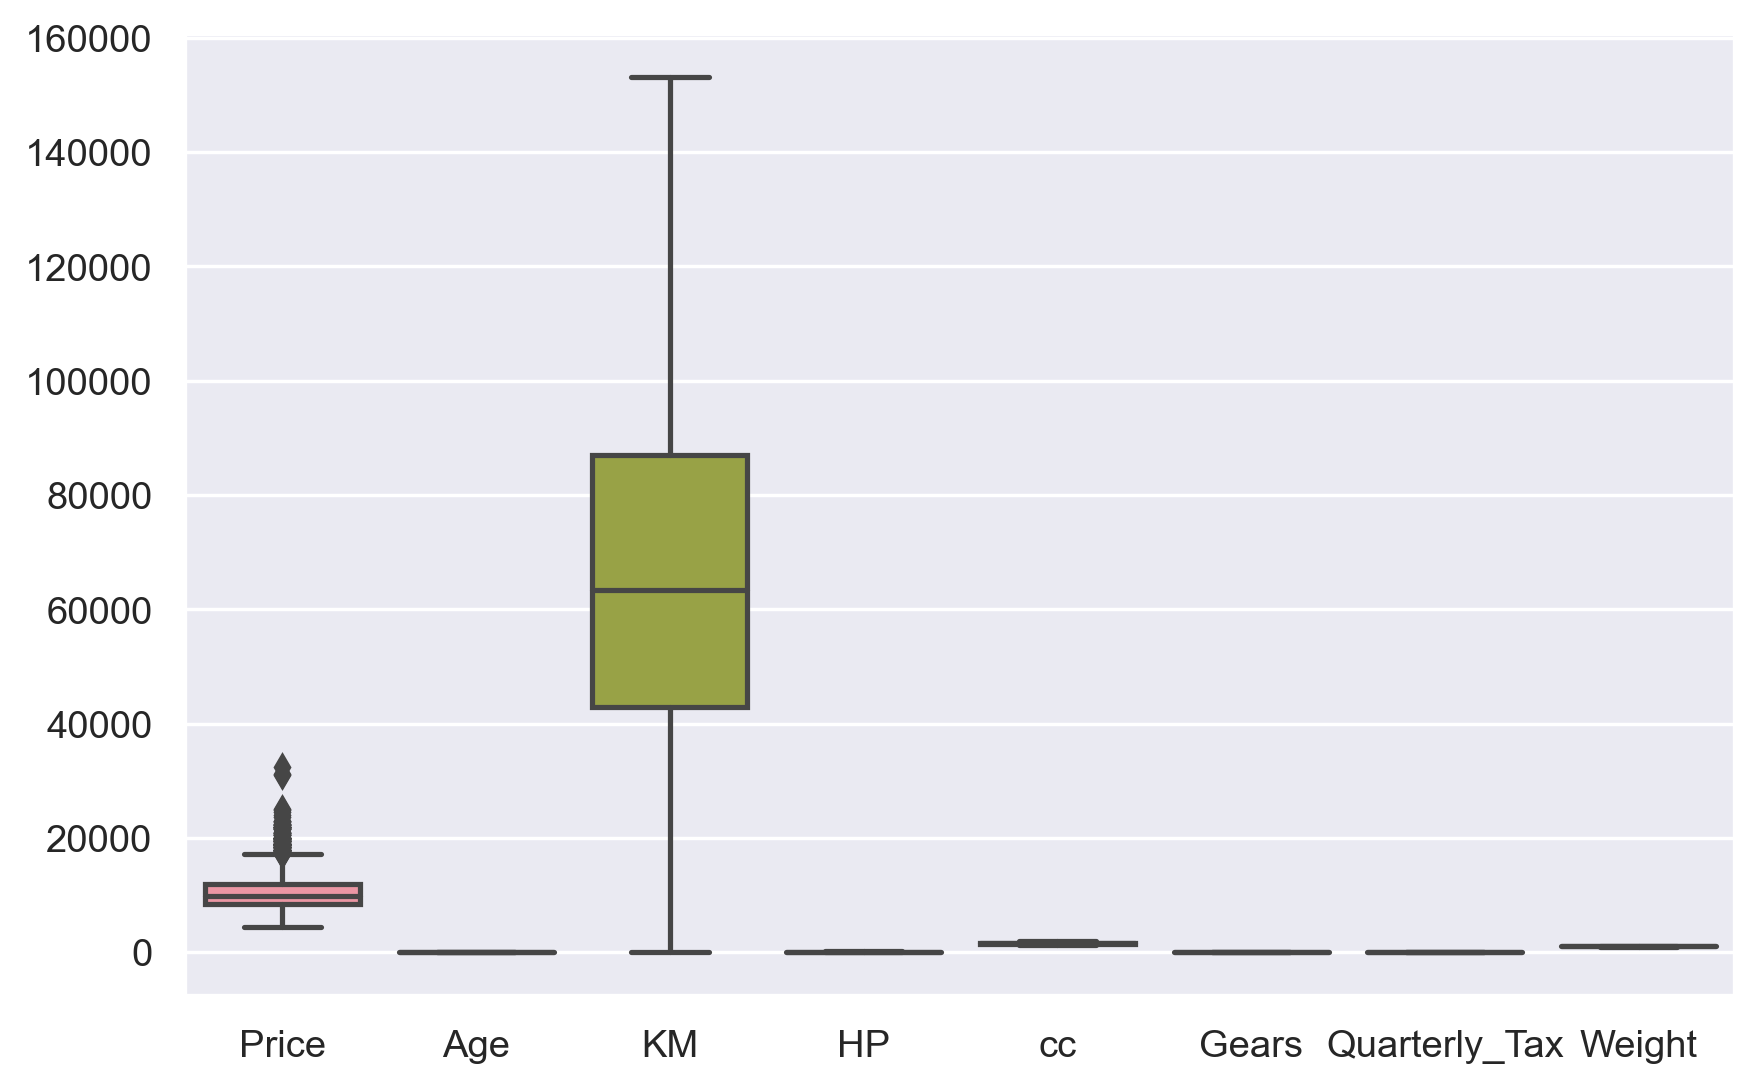

In [21]:
sns.boxplot(df)

In [ ]:
sns.pairplot(df)

In [22]:
df.corr()['Price'].sort_values()

Age             -0.875937
KM              -0.586871
cc               0.168424
HP               0.265753
Quarterly_Tax    0.269589
Weight           0.534909
Price            1.000000
Gears                 NaN
Name: Price, dtype: float64

In [23]:
df.corr()

,Price,Age,KM,HP,cc,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.875937,-0.586871,0.265753,0.168424,NaN,0.269589,0.534909
Age,-0.875937,1.000000,0.530670,-0.129602,-0.136644,NaN,-0.237889,-0.476150
KM,-0.586871,0.530670,1.000000,-0.329729,0.258680,NaN,0.159038,0.000977
HP,0.265753,-0.129602,-0.329729,1.000000,0.098192,NaN,-0.143947,0.024877
cc,0.168424,-0.136644,0.258680,0.098192,1.000000,NaN,0.581407,0.717782
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarterly_Tax,0.269589,-0.237889,0.159038,-0.143947,0.581407,NaN,1.000000,0.648266
Weight,0.534909,-0.476150,0.000977,0.024877,0.717782,NaN,0.648266,1.000000


In [24]:
df.drop('Gears',axis = 1, inplace=True)

<Axes: >

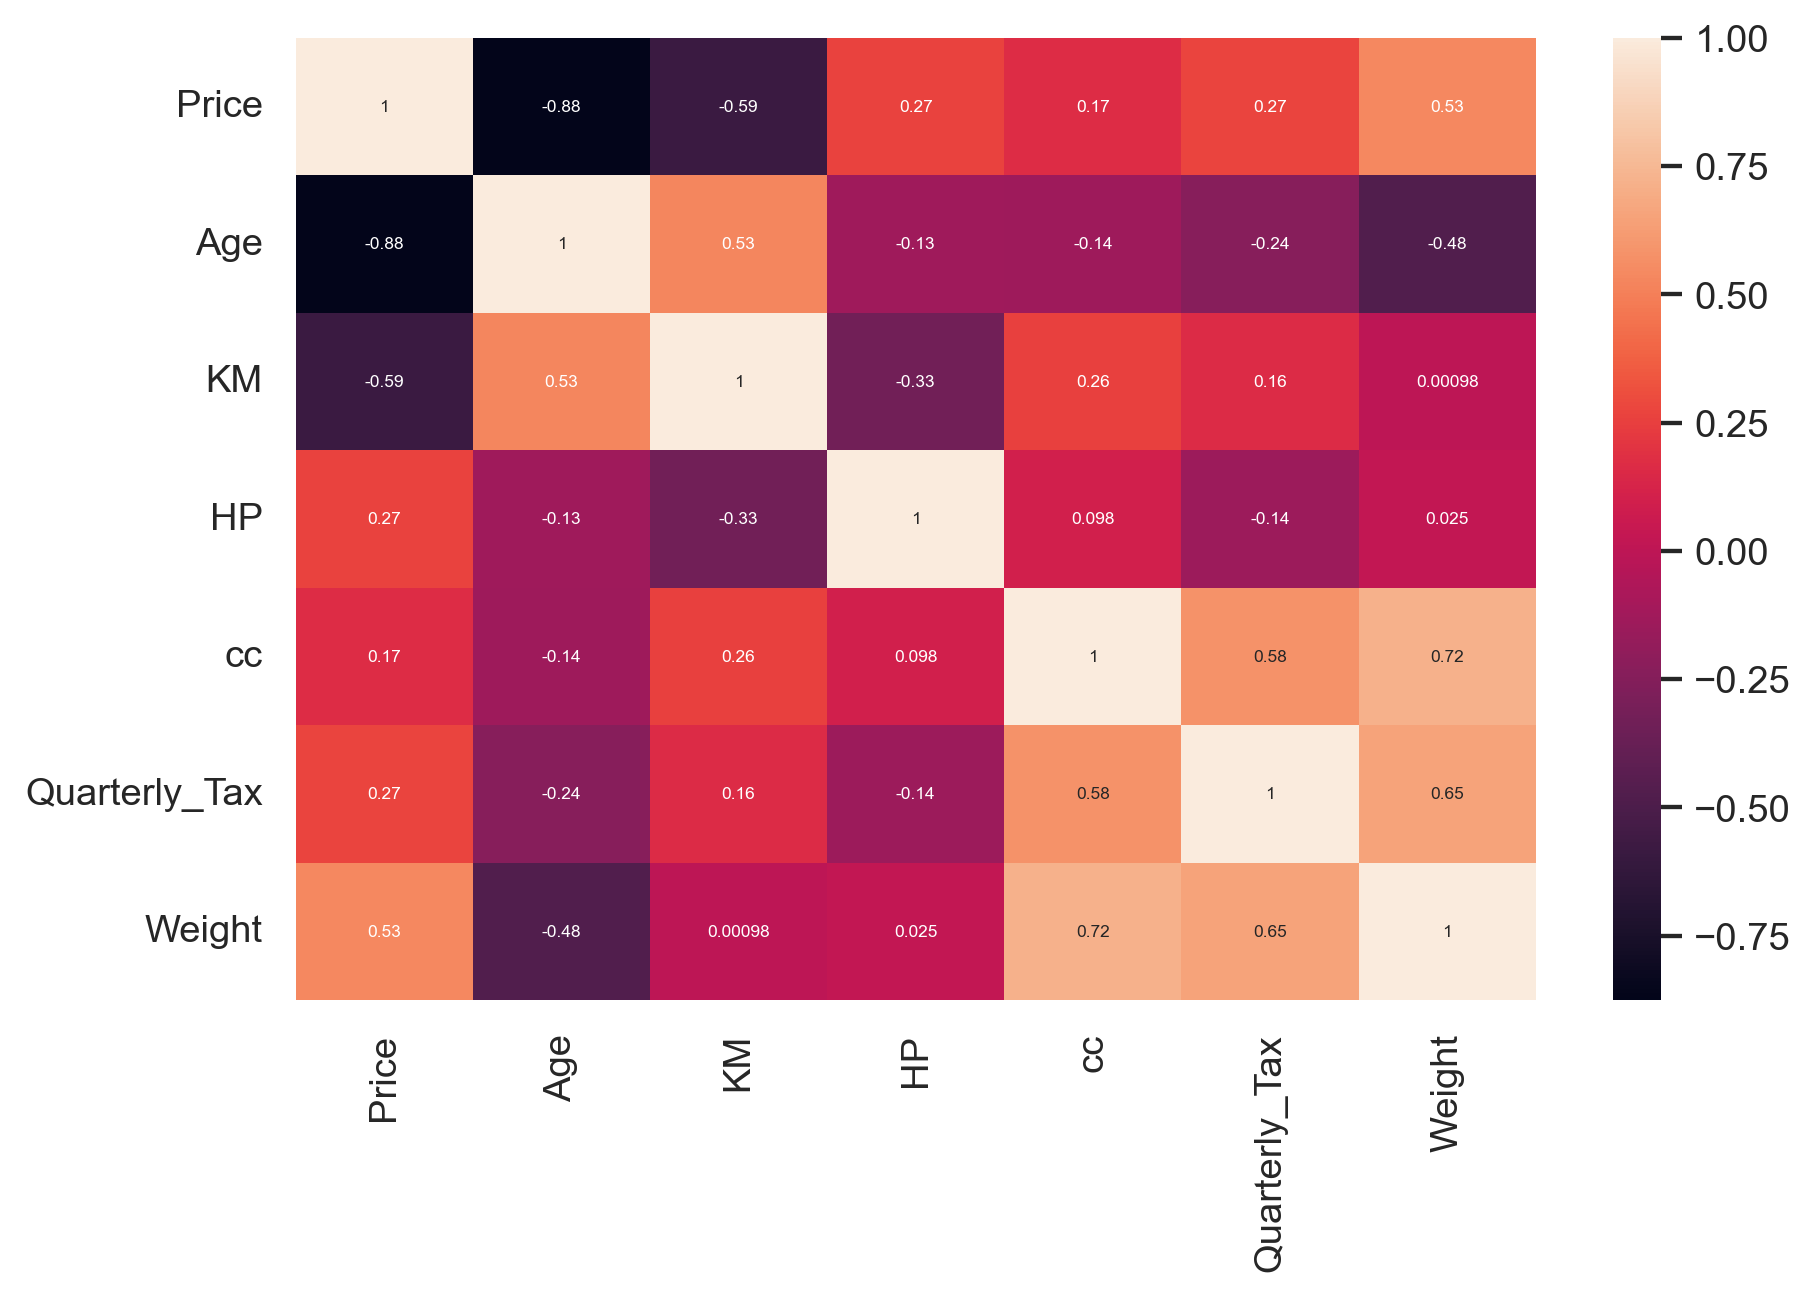

In [25]:
sns.heatmap(df.corr(),annot=True,annot_kws={"size": 5})

In [26]:
# importing vif model form statmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# as we only want to wrok with feature data we drop the target data 
data =  df.drop('Price',axis = 1)

In [28]:
# creating the dataframe to store VIF score for various feature variable
vif = pd.DataFrame()
vif['features'] = data.columns

In [29]:
# finding VIF score using list comprehension & storing it into dataframe
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

In [31]:
vif

,features,VIF
0,Age,15.251760
1,KM,9.230149
2,HP,72.838130
3,cc,186.448161
4,Quarterly_Tax,54.104898
5,Weight,228.811767


In [32]:
# training the model using Weight feature with rest other feature
model_weight = smf.ols('Price~Weight',data = df).fit()
model_weight.rsquared, model_weight.aic

(0.28612733677748714, 27100.177003130473)

In [33]:
 scaled_df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [34]:
scaled_df.head()

,Price,Age,KM,HP,cc,Quarterly_Tax,Weight
0,0.770368,-1.781129,-0.595118,-0.844145,2.024972,2.031291,2.226997
1,0.839669,-1.781129,0.152463,-0.844145,2.024972,2.031291,2.226997
2,0.895109,-1.727143,-0.747078,-0.844145,2.024972,2.031291,2.226997
3,1.172311,-1.619171,-0.565908,-0.844145,2.024972,2.031291,2.226997
4,0.839669,-1.403226,-0.839578,-0.844145,2.024972,2.031291,2.226997


In [35]:
final_model = smf.ols('Price~Weight+Age+KM+HP+cc+Quarterly_Tax',data = scaled_df).fit()

In [37]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:05:58   Log-Likelihood:                -714.92
No. Observations:                1435   AIC:                             1444.
Df Residuals:                    1428   BIC:                             1481.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.561e-17      0.011  -1.48e-15      1.000      -0.021       0.021
Weight            0.2787      0.019     14.305      0.000       0.240       0.317
Age              -0.6280      0.015    -41.210      0.000      -0.658      -0.598
KM               -0.1889      0.015    -12.923      0.000      -0.218      -0.160
HP                0.1342      0.012     11.313      0.000       0.111       0.157
cc               -0.1137      0.017     -6.507      0.000      -0.148      -0.079
Quarterly_Tax     0.0550      0.015      3.755      0.000       0.026       0.084
==============================================================================
Omnibus:                      439.411   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4133.552
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                      10.992   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
final_model.resid

0      -0.849497
1      -0.638942
2      -0.719562
3      -0.340318
4      -0.589048
          ...   
1430   -0.368522
1431    0.725928
1432    0.031185
1433   -0.349768
1434   -1.006248
Length: 1435, dtype: float64

Text(0.5, 1.0, 'q-q plot')

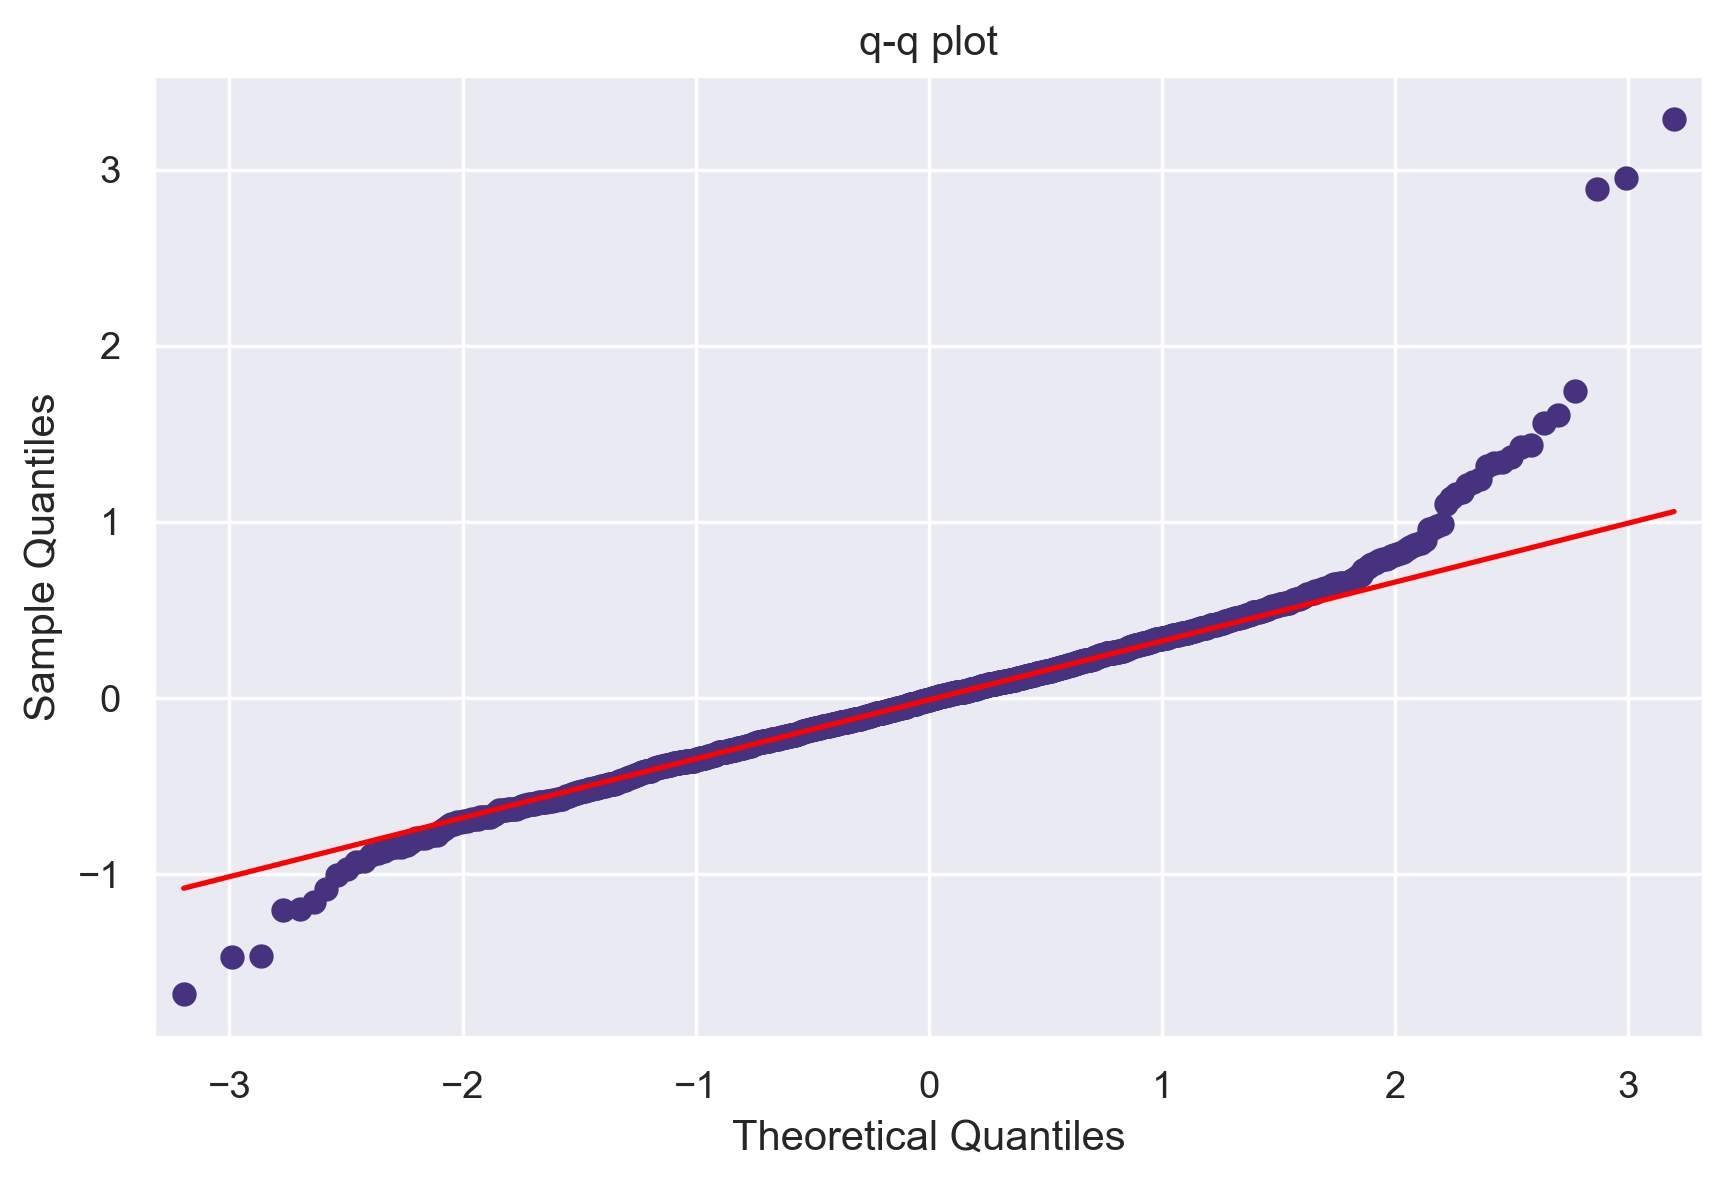

In [41]:
sm.qqplot(final_model.resid, line='q');
plt.title('q-q plot')

In [42]:
## presence of outliers on both side and errors are not normal 

Text(0.5, 1.0, 'resudial scatter plot')

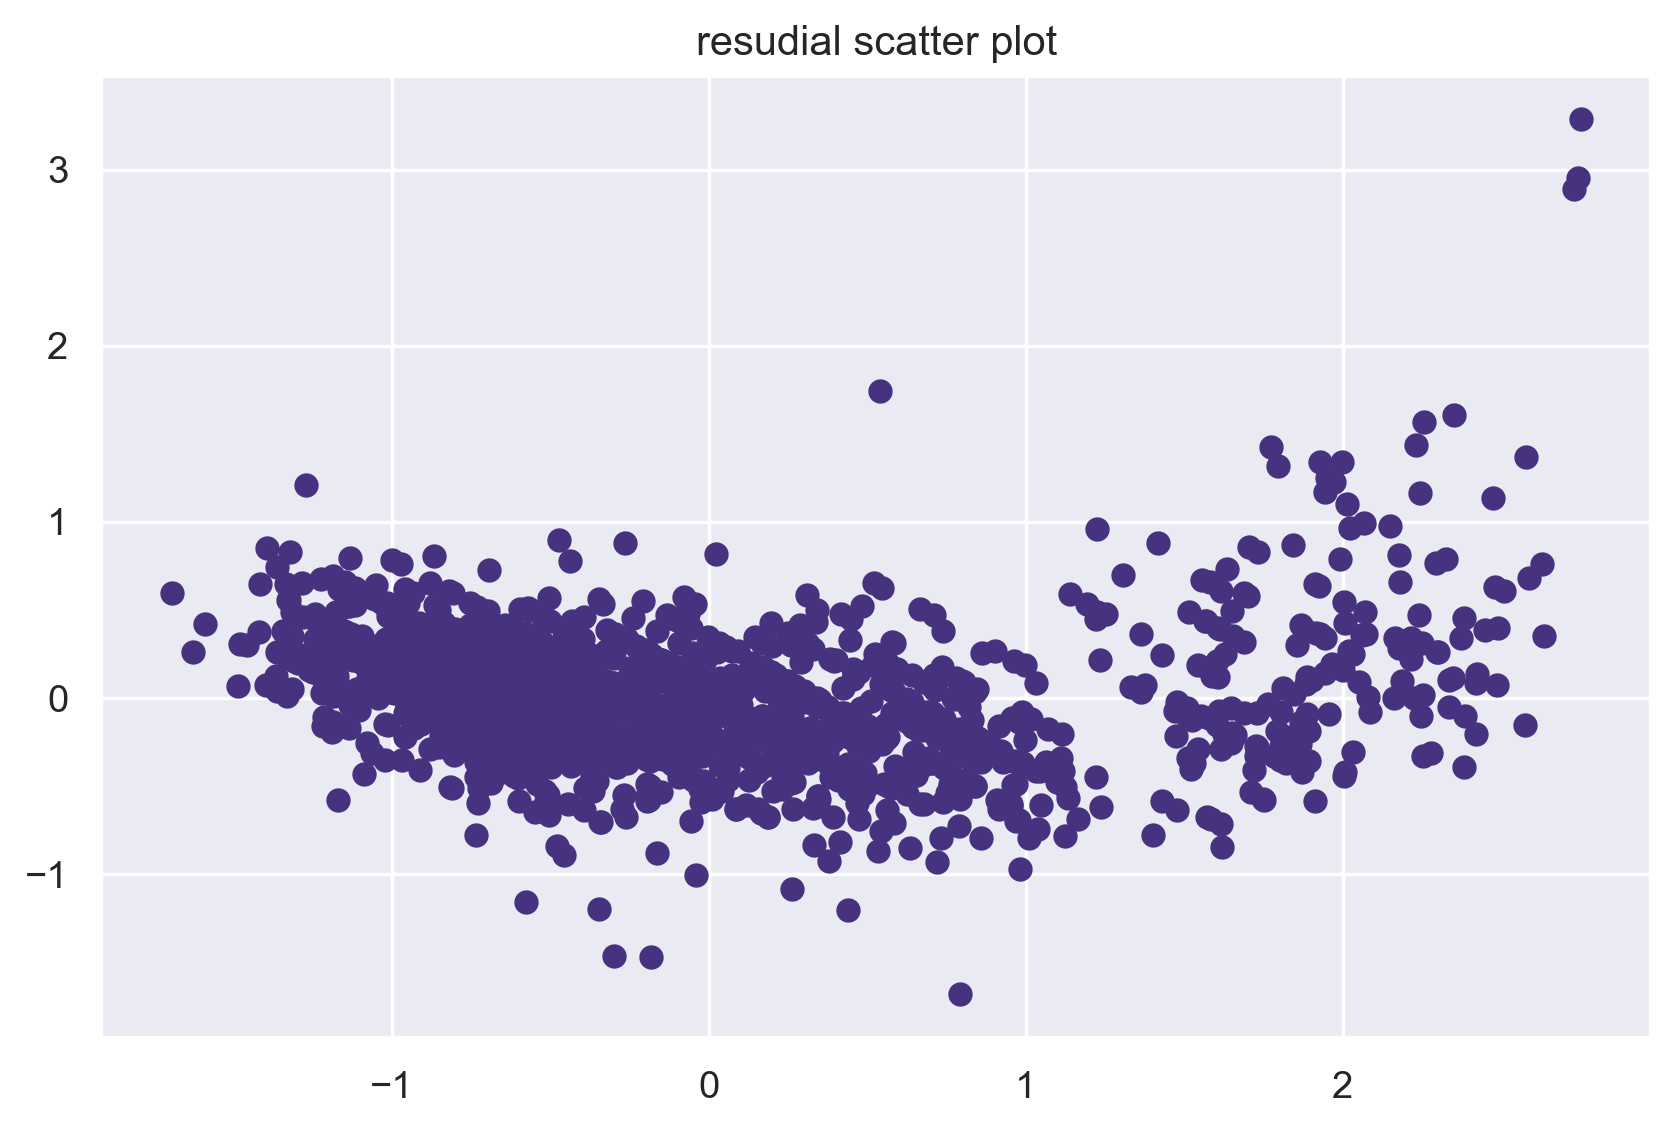

In [44]:
plt.scatter(final_model.fittedvalues, final_model.resid)
plt.title('resudial scatter plot')

In [45]:
## clustered pattern

In [47]:
#Find the influence data
inf = final_model.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

In [48]:
c

array([4.52261989e-03, 2.36416062e-03, 3.35777288e-03, ...,
       6.30539252e-06, 7.77446949e-04, 2.33856432e-02])

Text(0.5, 1.0, 'cooks distance plot')

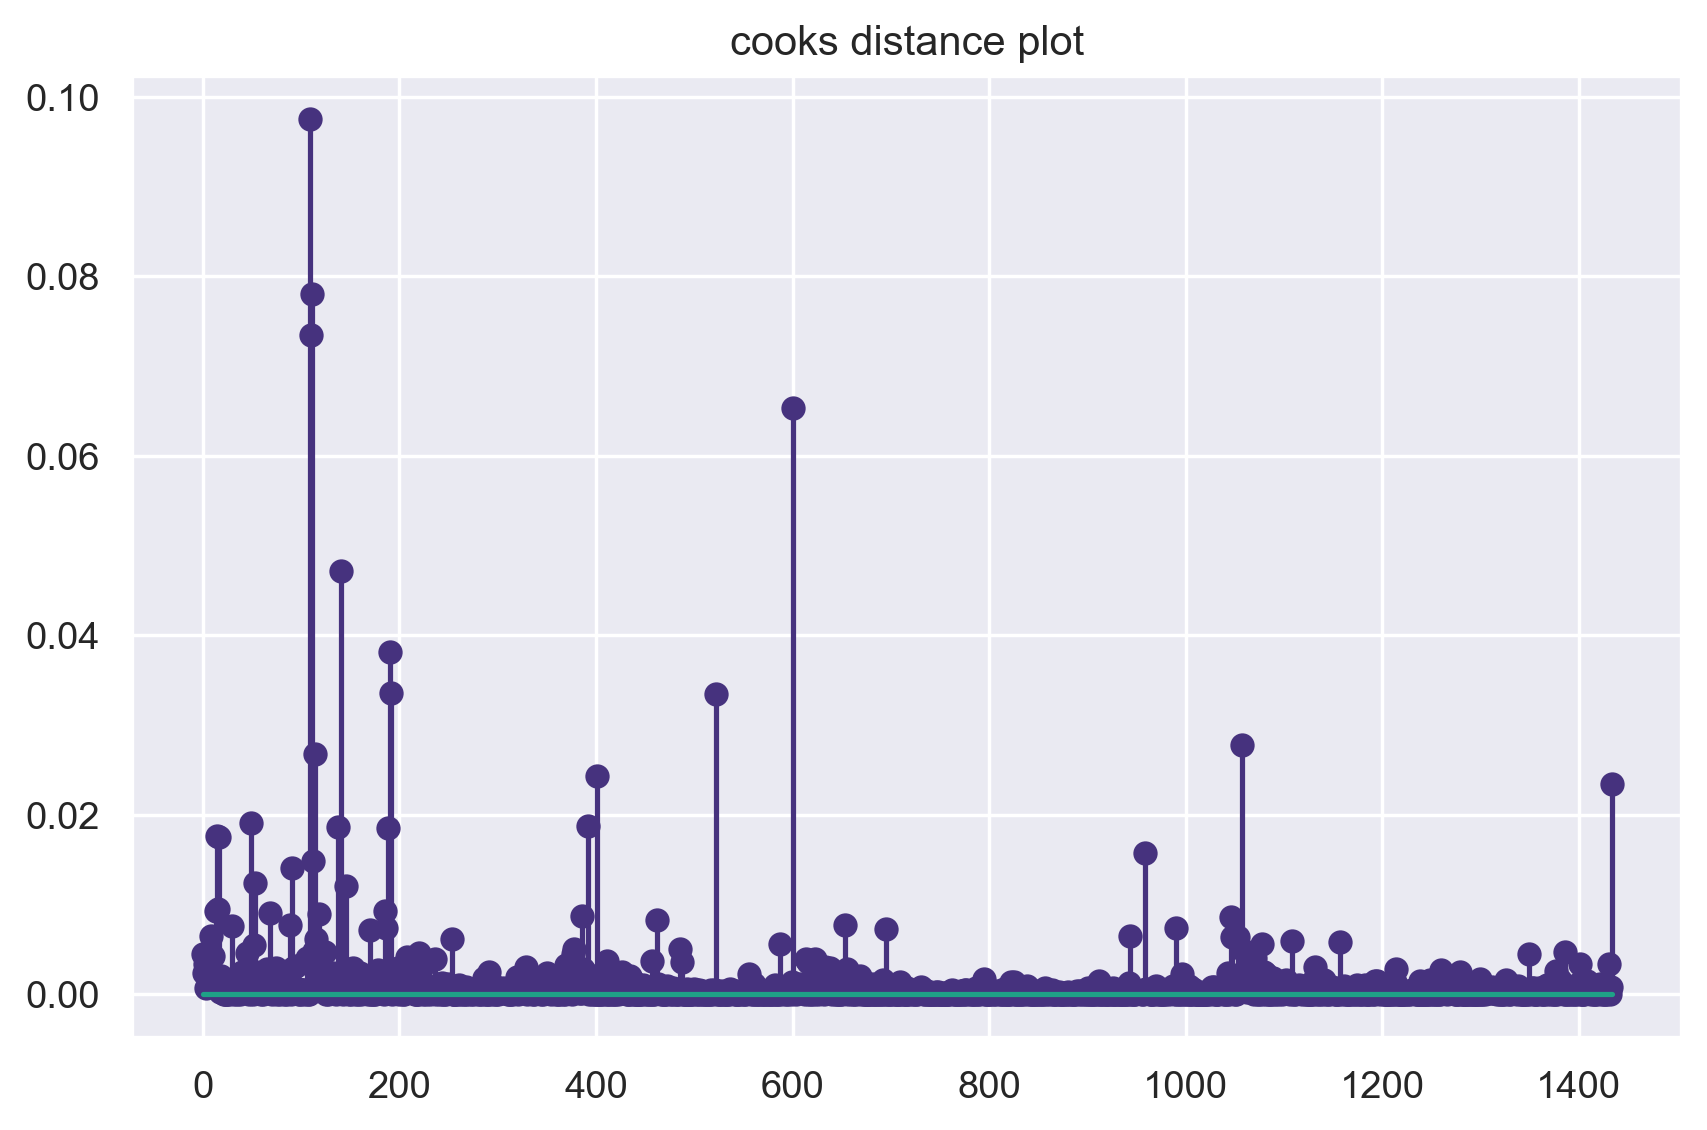

In [49]:
plt.stem(c)
plt.title('cooks distance plot')

(0.0, 1.0)

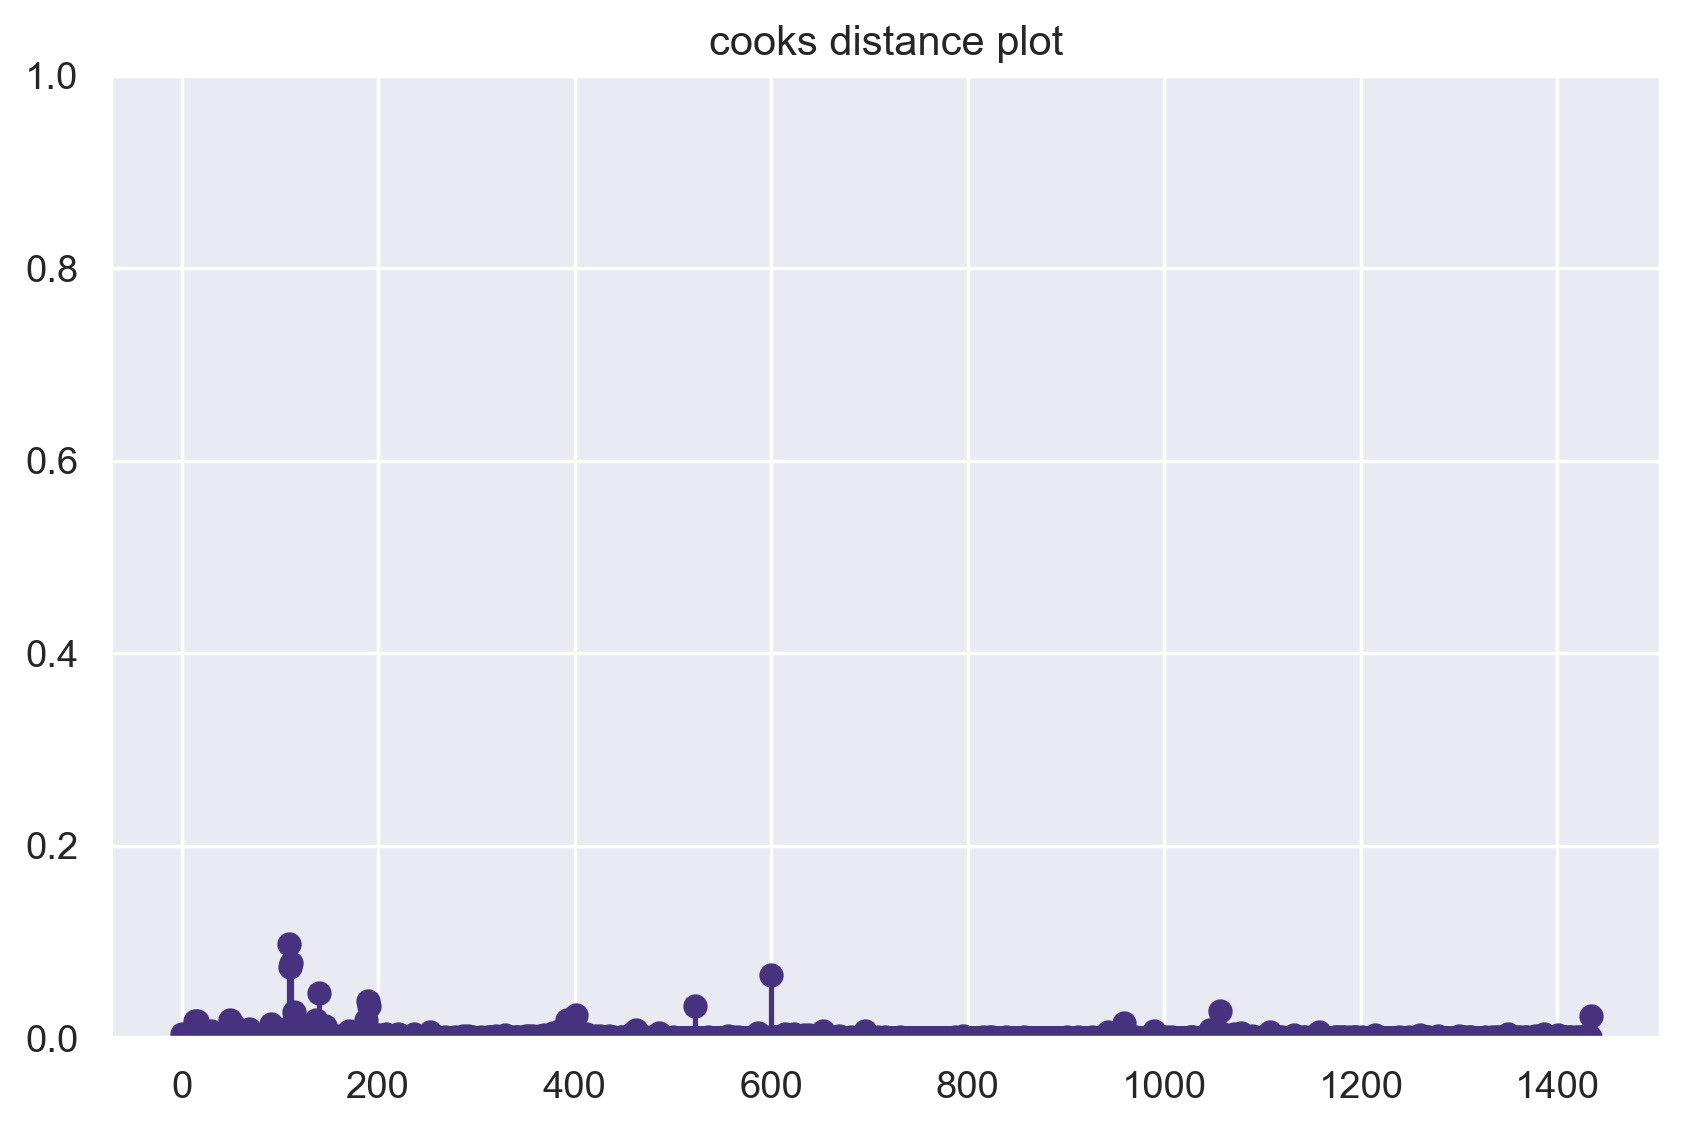

In [50]:
plt.stem(c)
plt.title('cooks distance plot')
plt.ylim(0,1)

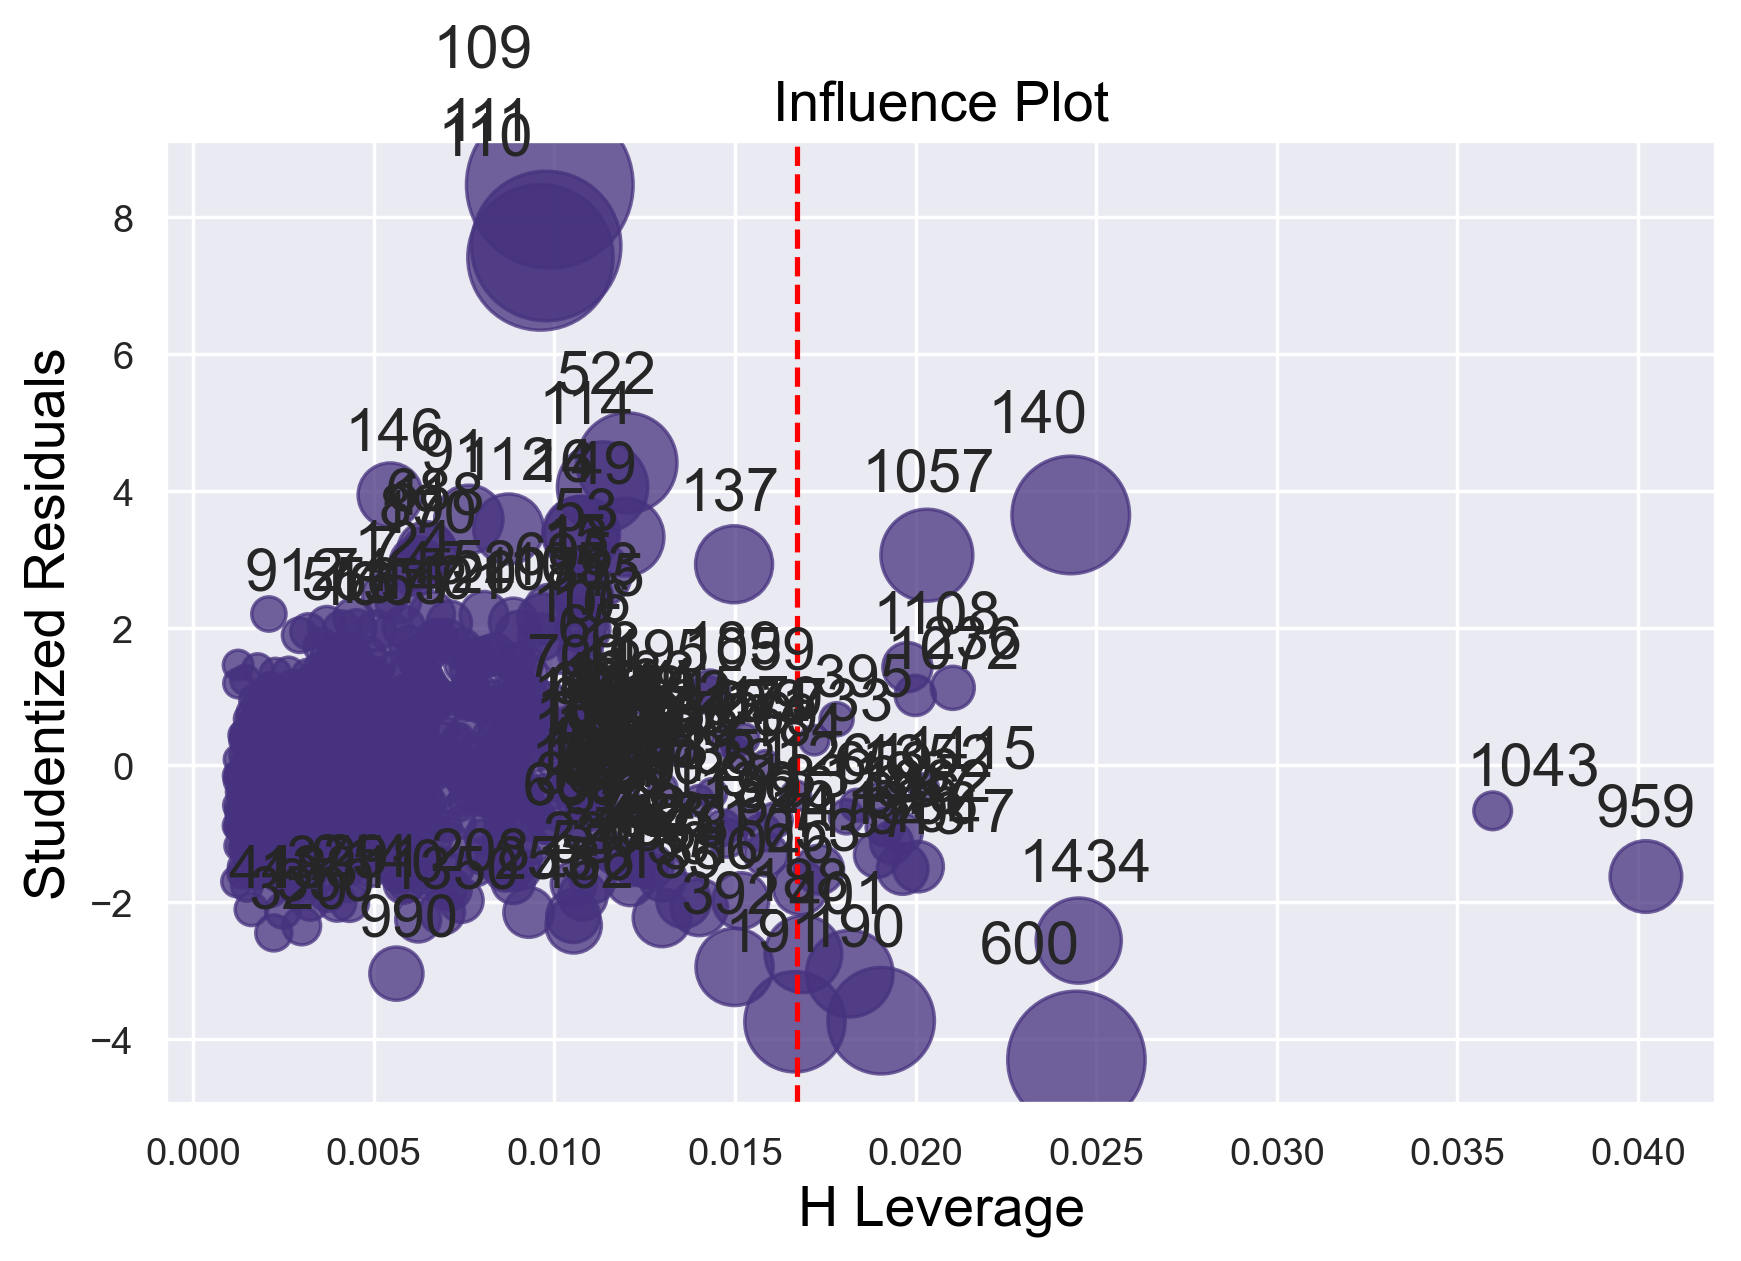

In [51]:
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

influence_plot(final_model)
plt.axvline(lv, linestyle = '--', color = 'red')

In [52]:
df.head()

,Price,Age,KM,HP,cc,Quarterly_Tax,Weight
0,13500,23,46986.0,90,1900,109,1152.5
1,13750,23,72937.0,90,1900,109,1152.5
2,13950,24,41711.0,90,1900,109,1152.5
3,14950,26,48000.0,90,1900,109,1152.5
4,13750,30,38500.0,90,1900,109,1152.5


In [53]:
np.argmax(c), np.max(c)

(109, 0.09749693018745471)

In [54]:
df.iloc[[109]]

,Price,Age,KM,HP,cc,Quarterly_Tax,Weight
109,32500,5,1.0,116,1900,109,1152.5


In [56]:
df.drop(index=109,inplace=True)

In [57]:
df.reset_index(inplace=True)
df.head()

,index,Price,Age,KM,HP,cc,Quarterly_Tax,Weight
0,0,13500,23,46986.0,90,1900,109,1152.5
1,1,13750,23,72937.0,90,1900,109,1152.5
2,2,13950,24,41711.0,90,1900,109,1152.5
3,3,14950,26,48000.0,90,1900,109,1152.5
4,4,13750,30,38500.0,90,1900,109,1152.5


In [58]:
df.drop(columns=['index'], inplace=True)

In [59]:
final_model = smf.ols('Price~Weight+Age+KM+HP+cc+Quarterly_Tax',data = scaled_df).fit()

In [60]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:07:50   Log-Likelihood:                -714.92
No. Observations:                1435   AIC:                             1444.
Df Residuals:                    1428   BIC:                             1481.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.561e-17      0.011  -1.48e-15      1.000      -0.021       0.021
Weight            0.2787      0.019     14.305      0.000       0.240       0.317
Age              -0.6280      0.015    -41.210      0.000      -0.658      -0.598
KM               -0.1889      0.015    -12.923      0.000      -0.218      -0.160
HP                0.1342      0.012     11.313      0.000       0.111       0.157
cc               -0.1137      0.017     -6.507      0.000      -0.148      -0.079
Quarterly_Tax     0.0550      0.015      3.755      0.000       0.026       0.084
==============================================================================
Omnibus:                      439.411   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4133.552
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                      10.992   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""